Stefannus Christian 202000138 (NIM Genap)

# Projek A

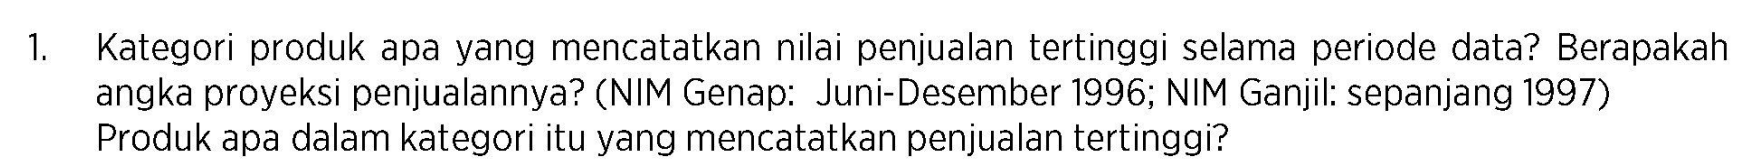

In [2]:
import pandas as pd
import scipy.stats as stats
from sklearn.preprocessing import OrdinalEncoder
pd.set_option('display.max_columns', None)

In [3]:
dates = {
    "Jan":1,
    "Feb":2,
    "Mar":3,
    "Apr":4,
    "May":5,
    "Jun":6,
    "Jul":7,
    "Aug":8,
    "Sep":9,
    "Oct":10,
    "Nov":11,
    "Dec":12
}

def convert_date(date: str, info):
    d,m,y = date.split('-')
    if info == 'day':
        return int(d)
    elif info == 'month':
        return dates[m]
    elif info == 'year':
        return int('19'+y)

In [4]:
categories = pd.read_csv('./Northwind_csv/Categories.csv',delimiter=';')
customers = pd.read_csv('./Northwind_csv/Customers.csv',delimiter=';')
employees = pd.read_csv('./Northwind_csv/Employees.csv',delimiter=';')
order_details = pd.read_csv('./Northwind_csv/OrderDetails.csv',delimiter=';')
orders = pd.read_csv('./Northwind_csv/Orders.csv',delimiter=';')
products = pd.read_csv('./Northwind_csv/Products.csv',delimiter=';')
shippers = pd.read_csv('./Northwind_csv/Shippers.csv',delimiter=';')
suppliers = pd.read_csv('./Northwind_csv/Suppliers.csv',delimiter=';')

In [5]:
orders["Order Date Day"] = orders['Order Date'].apply(lambda x: convert_date(x,'day'))
orders["Order Date Month"] = orders['Order Date'].apply(lambda x: convert_date(x,'month'))
orders["Order Date Year"] = orders['Order Date'].apply(lambda x: convert_date(x,'year'))

In [6]:
def clean_unit_price(unit_price): 
    unit_price = unit_price[1:]
    unit_price = unit_price.replace(',','.')
    return float(unit_price)

def clean_discount(discount):
    discount = discount[:-1]
    discount = discount.replace(',','.')
    return float(discount)

order_details["Unit Price"] = order_details["Unit Price"].apply(lambda x: clean_unit_price(x))

In [7]:
order_details["Discount"] = order_details["Discount"].apply(lambda x: clean_discount(x))

In [8]:
order_details

,Order ID,Product,Unit Price,Quantity,Discount
0,10248,Queso Cabrales,14.00,12,0.0
1,10248,Singaporean Hokkien Fried Mee,9.80,10,0.0
2,10248,Mozzarella di Giovanni,34.80,5,0.0
3,10249,Tofu,18.60,9,0.0
4,10249,Manjimup Dried Apples,42.40,40,0.0
...,...,...,...,...,...
2150,11077,Wimmers gute Semmelkndel,33.25,2,3.0
2151,11077,Louisiana Hot Spiced Okra,17.00,1,0.0
2152,11077,Rd Kaviar,15.00,2,1.0
2153,11077,Rhnbru Klosterbier,7.75,4,0.0


In [9]:
order_details["Nilai Penjualan"] = order_details["Unit Price"] * order_details["Quantity"] * (1-(order_details["Discount"]/100))
order_details

,Order ID,Product,Unit Price,Quantity,Discount,Nilai Penjualan
0,10248,Queso Cabrales,14.00,12,0.0,168.000
1,10248,Singaporean Hokkien Fried Mee,9.80,10,0.0,98.000
2,10248,Mozzarella di Giovanni,34.80,5,0.0,174.000
3,10249,Tofu,18.60,9,0.0,167.400
4,10249,Manjimup Dried Apples,42.40,40,0.0,1696.000
...,...,...,...,...,...,...
2150,11077,Wimmers gute Semmelkndel,33.25,2,3.0,64.505
2151,11077,Louisiana Hot Spiced Okra,17.00,1,0.0,17.000
2152,11077,Rd Kaviar,15.00,2,1.0,29.700
2153,11077,Rhnbru Klosterbier,7.75,4,0.0,31.000


In [10]:
order_order_details = orders.merge(order_details,left_on="Order ID",right_on="Order ID")
order_order_details_products = order_order_details.merge(products,left_on="Product",right_on="Product Name")
order_order_details_products.groupby(["Category"]).sum().sort_values('Nilai Penjualan',ascending=False)

,Order ID,Order Date Day,Order Date Month,Order Date Year,Unit Price_x,Quantity,Discount,Nilai Penjualan,ProductID,Units In Stock,Units On Order,Reorder Level,Discontinued
Category,,,,,,,,,,,,,
Beverages,4312144,6346,2371,806085,11811.65,9532,2500.0,267868.1800,16356,18111,2430,6715,51
Dairy Products,3894474,6016,2248,730230,9875.80,9149,1956.0,234507.2850,17806,13424,5310,3640,0
Confections,3557446,5334,1945,666404,7549.30,7906,1902.0,167357.2250,12147,7944,3580,2895,0
Meat/Poultry,1839680,2947,1028,345164,7417.33,4199,1115.0,163022.3595,6951,4696,0,1020,104
Seafood,3523066,5253,2022,658433,6290.78,7681,1988.0,131261.7375,11139,21178,1280,3790,0
Condiments,2303505,3258,1352,430965,4605.30,5298,1137.0,106047.0850,9557,10416,1640,2405,10
Produce,1450501,2147,755,271356,4786.45,2990,618.0,99984.5800,4386,2895,260,745,33
Grains/Cereals,2090139,2731,1171,391069,4164.30,4562,888.0,95744.5875,9567,7096,2900,4435,30


In [11]:
order_order_details_products.head()

,Order ID,Customer,Employee,Order Date,Required Date,Shipped Date,Ship Via,Freight,Ship Name,Ship Address,Ship City,Ship Region,Ship Postal Code,Ship Country,Order Date Day,Order Date Month,Order Date Year,Product,Unit Price_x,Quantity,Discount,Nilai Penjualan,ProductID,Product Name,Supplier,Category,Quantity Per Unit,Unit Price_y,Units In Stock,Units On Order,Reorder Level,Discontinued
0,10248,Vins et alcools Chevalier,"Buchanan, Steven",04-Aug-94,01-Sep-94,16-Aug-94,Federal Shipping,Rp32,Vins et alcools Chevalier,59 rue de l'Abbaye,Reims,NaN,51100,France,4,8,1994,Queso Cabrales,14.0,12,0.0,168.00,11,Queso Cabrales,Cooperativa de Quesos 'Las Cabras',Dairy Products,1 kg pkg.,"$21,00",22,30,30,False
1,10296,LILA-Supermercado,"Suyama, Michael",04-Oct-94,01-Nov-94,12-Oct-94,Speedy Express,Rp0,LILA-Supermercado,Carrera 52 con Ave. Bolvar #65-98 Llano Largo,Barquisimeto,Lara,3508,Venezuela,4,10,1994,Queso Cabrales,16.8,12,0.0,201.60,11,Queso Cabrales,Cooperativa de Quesos 'Las Cabras',Dairy Products,1 kg pkg.,"$21,00",22,30,30,False
2,10327,Folk och f HB,"Fuller, Andrew",11-Nov-94,09-Dec-94,14-Nov-94,Speedy Express,Rp63,Folk och f HB,kergatan 24,Brcke,NaN,S-844 67,Sweden,11,11,1994,Queso Cabrales,16.8,50,20.0,672.00,11,Queso Cabrales,Cooperativa de Quesos 'Las Cabras',Dairy Products,1 kg pkg.,"$21,00",22,30,30,False
3,10353,Piccolo und mehr,"King, Robert",14-Dec-94,11-Jan-95,26-Dec-94,Federal Shipping,Rp361,Piccolo und mehr,Geislweg 14,Salzburg,NaN,5020,Austria,14,12,1994,Queso Cabrales,16.8,12,20.0,161.28,11,Queso Cabrales,Cooperativa de Quesos 'Las Cabras',Dairy Products,1 kg pkg.,"$21,00",22,30,30,False
4,10365,Antonio Moreno Taquera,"Leverling, Janet",28-Dec-94,25-Jan-95,02-Jan-95,United Package,Rp22,Antonio Moreno Taquera,Mataderos 2312,Mxico D.F.,NaN,5023,Mexico,28,12,1994,Queso Cabrales,16.8,24,0.0,403.20,11,Queso Cabrales,Cooperativa de Quesos 'Las Cabras',Dairy Products,1 kg pkg.,"$21,00",22,30,30,False


In [12]:
beverages = order_order_details_products[order_order_details_products["Category"] == "Beverages"]
beverages.groupby(["Product Name"]).sum().sort_values("Nilai Penjualan",ascending=False)

,Order ID,Order Date Day,Order Date Month,Order Date Year,Unit Price_x,Quantity,Discount,Nilai Penjualan,ProductID,Units In Stock,Units On Order,Reorder Level,Discontinued
Product Name,,,,,,,,,,,,,
Cte de Blaye,255583,410,120,47887,5902.40,623,110.0,141396.735,912,408,0,360,0
Ipoh Coffee,298531,401,169,55866,1205.20,580,140.0,23526.700,1204,476,280,700,0
Chang,470965,696,245,87795,786.60,1057,450.0,16355.960,88,748,1760,1100,0
Lakkalikri,415841,554,260,77812,662.40,981,205.0,15760.440,2964,2223,0,780,0
Steeleye Stout,383553,552,200,71829,612.00,883,170.0,13644.000,1260,720,0,540,0
Chai,406841,558,243,75821,651.60,828,295.0,12788.100,38,1482,0,380,0
Chartreuse verte,318790,432,174,59855,500.40,793,200.0,12294.540,1170,2070,0,150,0
Outback Lager,416162,673,218,77816,552.00,817,245.0,10672.650,2730,585,390,1170,0
Rhnbru Klosterbier,490967,785,275,91782,339.45,1155,240.0,8177.490,3450,5750,0,1150,0


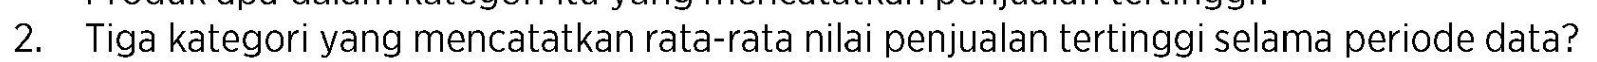

In [13]:
order_order_details_products.groupby(["Category"]).mean().sort_values('Nilai Penjualan',ascending=False)

,Order ID,Order Date Day,Order Date Month,Order Date Year,Unit Price_x,Quantity,Discount,Nilai Penjualan,ProductID,Units In Stock,Units On Order,Reorder Level,Discontinued
Category,,,,,,,,,,,,,
Meat/Poultry,10633.988439,17.034682,5.942197,1995.167630,42.874740,24.271676,6.445087,942.325777,40.179191,27.144509,0.000000,5.895954,0.601156
Produce,10665.448529,15.786765,5.551471,1995.264706,35.194485,21.985294,4.544118,735.180735,32.250000,21.286765,1.911765,5.477941,0.242647
Beverages,10673.623762,15.707921,5.868812,1995.259901,29.236757,23.594059,6.188119,663.040050,40.485149,44.829208,6.014851,16.621287,0.126238
Dairy Products,10640.639344,16.437158,6.142077,1995.163934,26.983060,24.997268,5.344262,640.730287,48.650273,36.677596,14.508197,9.945355,0.000000
Confections,10651.035928,15.970060,5.823353,1995.221557,22.602695,23.670659,5.694611,501.069536,36.368263,23.784431,10.718563,8.667665,0.000000
Condiments,10664.375000,15.083333,6.259259,1995.208333,21.320833,24.527778,5.263889,490.958727,44.245370,48.222222,7.592593,11.134259,0.046296
Grains/Cereals,10663.974490,13.933673,5.974490,1995.250000,21.246429,23.275510,4.530612,488.492793,48.811224,36.204082,14.795918,22.627551,0.153061
Seafood,10675.957576,15.918182,6.127273,1995.251515,19.062970,23.275758,6.024242,397.762841,33.754545,64.175758,3.878788,11.484848,0.000000


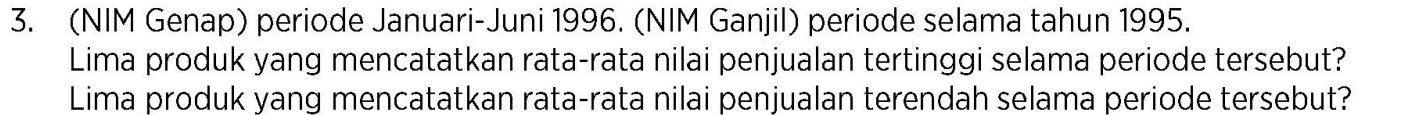

In [14]:
order_order_details_products_jan_june_96 = order_order_details_products[(order_order_details_products["Order Date Year"] == 1996) & (order_order_details_products["Order Date Month"] < 7)]
order_order_details_products_jan_june_96.groupby(["Product Name"]).mean().sort_values('Nilai Penjualan',ascending=False).head()

,Order ID,Order Date Day,Order Date Month,Order Date Year,Unit Price_x,Quantity,Discount,Nilai Penjualan,ProductID,Units In Stock,Units On Order,Reorder Level,Discontinued
Product Name,,,,,,,,,,,,,
Cte de Blaye,10873.727273,15.545455,2.636364,1996.0,263.50,25.000000,0.909091,6479.704545,38.0,17.0,0.0,15.0,0.0
Thringer Rostbratwurst,10896.500000,17.785714,2.928571,1996.0,123.79,27.857143,11.785714,2983.339000,29.0,0.0,0.0,0.0,1.0
Raclette Courdavault,10919.062500,16.187500,3.312500,1996.0,55.00,36.125000,3.437500,1867.421875,59.0,79.0,0.0,0.0,0.0
Sir Rodney's Marmalade,10952.857143,13.142857,4.000000,1996.0,81.00,15.857143,2.000000,1243.465714,20.0,40.0,0.0,0.0,0.0
Schoggi Schokolade,10881.750000,15.000000,2.750000,1996.0,43.90,26.250000,0.000000,1152.375000,27.0,49.0,0.0,30.0,0.0


In [15]:
order_order_details_products_jan_june_96.groupby(["Product Name"]).mean().sort_values('Nilai Penjualan',ascending=False).tail()

,Order ID,Order Date Day,Order Date Month,Order Date Year,Unit Price_x,Quantity,Discount,Nilai Penjualan,ProductID,Units In Stock,Units On Order,Reorder Level,Discontinued
Product Name,,,,,,,,,,,,,
Rd Kaviar,10979.000000,9.000000,4.500000,1996.0,15.00,6.000000,0.500000,89.850000,73.0,101.0,0.0,5.0,0.0
Tourtire,10880.333333,23.555556,2.444444,1996.0,7.45,14.000000,12.777778,86.875278,54.0,21.0,0.0,10.0,0.0
Chocolade,10814.000000,5.000000,2.000000,1996.0,12.75,8.000000,15.000000,86.700000,48.0,15.0,70.0,25.0,0.0
Filo Mix,10926.076923,11.153846,3.615385,1996.0,7.00,12.461538,5.769231,78.319231,52.0,38.0,0.0,25.0,0.0
Geitost,10940.000000,19.000000,3.600000,1996.0,2.50,20.200000,4.500000,47.662500,33.0,112.0,0.0,20.0,0.0


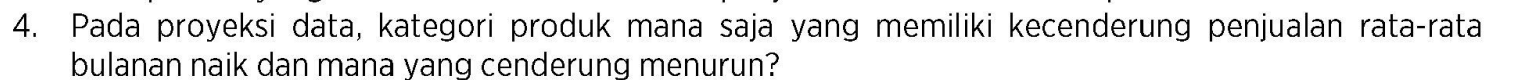

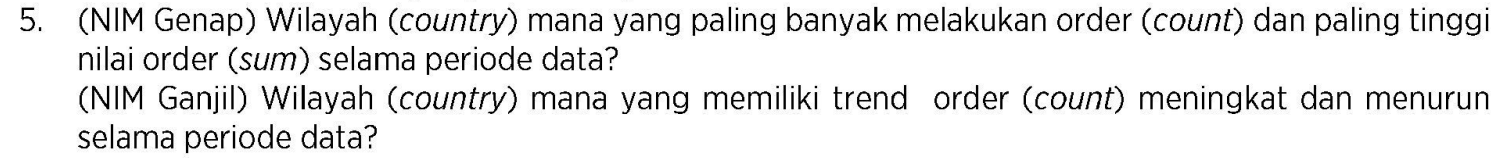

In [16]:
order_order_details_customers = order_order_details.merge(customers,left_on="Customer",right_on="Company Name")
order_order_details_customers.groupby(["Country"]).count().sort_values('Nilai Penjualan',ascending=False)

,Order ID,Customer,Employee,Order Date,Required Date,Shipped Date,Ship Via,Freight,Ship Name,Ship Address,Ship City,Ship Region,Ship Postal Code,Ship Country,Order Date Day,Order Date Month,Order Date Year,Product,Unit Price,Quantity,Discount,Nilai Penjualan,Customer ID,Company Name,Contact Name,Contact Title,Address,City,Region,Postal Code,Phone,Fax
Country,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
USA,352,352,352,352,352,325,352,352,352,352,352,352,352,352,352,352,352,352,352,352,352,352,352,352,352,352,352,352,352,352,352,197
Germany,328,328,328,328,328,321,328,328,328,328,328,0,328,328,328,328,328,328,328,328,328,328,328,328,328,328,328,328,0,328,328,192
Brazil,203,203,203,203,203,197,203,203,203,203,203,203,203,203,203,203,203,203,203,203,203,203,203,203,203,203,203,203,203,203,203,69
France,182,182,182,182,182,178,182,182,182,182,182,0,182,182,182,182,182,182,182,182,182,182,182,182,182,182,182,182,0,182,182,182
UK,135,135,135,135,135,135,135,135,135,135,135,53,135,135,135,135,135,135,135,135,135,135,135,135,135,135,135,135,23,135,135,90
Austria,125,125,125,125,125,118,125,125,125,125,125,0,125,125,125,125,125,125,125,125,125,125,125,125,125,125,125,125,0,125,125,125
Venezuela,118,118,118,118,118,110,118,118,118,118,118,118,118,118,118,118,118,118,118,118,118,118,118,118,118,118,118,118,118,118,118,118
Sweden,97,97,97,97,97,97,97,97,97,97,97,0,97,97,97,97,97,97,97,97,97,97,97,97,97,97,97,97,0,97,97,52
Canada,75,75,75,75,75,73,75,75,75,75,75,75,75,75,75,75,75,75,75,75,75,75,75,75,75,75,75,75,75,75,75,75


In [17]:
order_order_details_customers.groupby(["Country"]).sum().sort_values('Nilai Penjualan',ascending=False)

,Order ID,Order Date Day,Order Date Month,Order Date Year,Unit Price,Quantity,Discount,Nilai Penjualan
Country,,,,,,,,
USA,3764864,5600,2339,702326,10462.91,9330,2094.0,245584.6105
Germany,3487000,5232,2143,654398,8544.84,9213,2070.0,230284.6335
Austria,1332339,1954,680,249408,3469.95,5167,860.0,128003.8385
Brazil,2162294,3342,1149,405033,5324.64,4247,1350.0,106925.7765
France,1935829,2907,1075,363124,4805.81,3224,1005.0,80837.9125
UK,1439114,2049,733,269363,3116.87,2742,310.0,58971.3100
Venezuela,1260576,1941,639,235447,2434.91,2936,790.0,56810.6290
Sweden,1034937,1206,526,193545,2486.49,2235,685.0,54495.1400
Canada,797169,992,418,149640,1907.50,1984,480.0,50196.2900


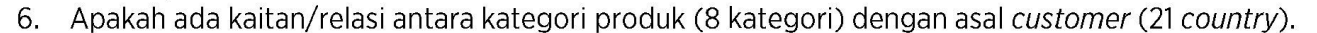

In [18]:
categories_products = categories.merge(products,left_on="Category Name",right_on="Category")
categories_products_order_details_order_customers = categories_products.merge(order_order_details_customers,left_on = "Product Name",right_on="Product")
# corr = categories_products_order_details_order_customers["Country"].corr(categories_products_order_details_order_customers["Category"])

In [19]:
import numpy as np
ordinalEncoder = OrdinalEncoder()

country_df = np.array(categories_products_order_details_order_customers["Country"]).reshape(-1,1)
country_ordinal_encoder = ordinalEncoder.fit_transform(country_df)

categories_df = np.array(categories_products_order_details_order_customers["Category"]).reshape(-1,1)
categories_ordinal_encoder = ordinalEncoder.fit_transform(categories_df)

In [20]:
categories_products_order_details_order_customers["Country Ordinal"] = country_ordinal_encoder
categories_products_order_details_order_customers["Category Ordinal"] = categories_ordinal_encoder
categories_products_order_details_order_customers["Category Ordinal"].corr(categories_products_order_details_order_customers["Country Ordinal"])

0.02760358198744432

In [21]:
categories_products_order_details_order_customers.groupby(["Country","Category"]).sum()

Category ID  Picture  ProductID  Units In Stock  \
Country   Category                                                          
Argentina Beverages                 7      0.0        368             399   
          Condiments                6      0.0        143             145   
          Confections              24      0.0        241             146   
          Dairy Products           24      0.0        238             236   
          Grains/Cereals            5      0.0         57              36   
...                               ...      ...        ...             ...   
Venezuela Dairy Products           92      0.0       1163             650   
          Grains/Cereals           45      0.0        439             338   
          Meat/Poultry             36      0.0        301             366   
          Produce                  56      0.0        341             141   
          Seafood                 184      0.0        784            1389   

                          Units On Order  Reorder Level  Discontinued  \
Country   Category                                                      
Argentina Beverages                   10            125             0   
          Condiments                   0             40             1   
          Confections                150             50             0   
          Dairy Products             140             95             0   
          Grains/Cereals               0             20             0   
...                                  ...            ...           ...   
Venezuela Dairy Products             310            240             0   
          Grains/Cereals             160            195             1   
          Meat/Poultry                 0             70             2   
          Produce                     40             40             3   
          Seafood                    140            300             0   

                          Order ID  Order Date Day  Order Date Month  \
Country   Category                                                     
Argentina Beverages          75964             123                24   
          Condiments         32660              70                19   
          Confections        85843             167                35   
          Dairy Products     65227             128                23   
          Grains/Cereals     10916              29                 3   
...                            ...             ...               ...   
Venezuela Dairy Products    243476             378               151   
          Grains/Cereals     97519             134                35   
          Meat/Poultry       63150             160                25   
          Produce            85993             150                34   
          Seafood           247874             367               116   

                          Order Date Year  Unit Price_y  Quantity  Discount  \
Country   Category                                                            
Argentina Beverages                 13971        381.25        82       0.0   
          Condiments                 5987         62.85        45       0.0   
          Confections               15964        254.85        57       0.0   
          Dairy Products            11975        157.80        54       0.0   
          Grains/Cereals             1996         19.50        20       0.0   
...                                   ...           ...       ...       ...   
Venezuela Dairy Products            45885        693.30       555     120.0   
          Grains/Cereals            17962        164.00       244      60.0   
          Meat/Poultry              11970        190.25       192      75.0   
          Produce                   15964        278.20       150       5.0   
          Seafood                   45898        397.43       592     220.0   

                          Nilai Penjualan  Country Ordinal  Category Ordinal  
Country   Category            

In [22]:
# Create a contingency table of Product Category and Customer Country
cont_table = pd.crosstab(categories_products_order_details_order_customers['Category'], categories_products_order_details_order_customers['Country'])

# Apply the chi-squared test to the contingency table
chi2, pval, dof, expected = stats.chi2_contingency(cont_table)

# Print the results
print('Chi-squared statistic:', chi2)
print('P-value:', pval)

Chi-squared statistic: 145.27062658850997
P-value: 0.36285296961683283


In [23]:
cont_table = pd.crosstab(categories_products_order_details_order_customers['Category'], categories_products_order_details_order_customers['Country'])

chi2, p, dof, expected = stats.chi2_contingency(cont_table)

n = min(cont_table.shape)

v = np.sqrt(chi2/(n*(min(n-1, dof-1))))

print("Cramer's V statistic:", v)
print("P-value:", p)

Cramer's V statistic: 1.6106266891920293
P-value: 0.36285296961683283


Berdasarkan ukuran korelasi yang diberikan dan analisis manual yang dilakukan, dapat disimpulkan bahwa terdapat hubungan yang lemah atau tidak ada hubungan sama sekali antara Kategori Produk dan Negara Pelanggan.

Koefisien korelasi yang diperoleh menggunakan fungsi corr hanya sebesar 0.027, menunjukkan adanya korelasi positif yang lemah antara kedua variabel. Begitu juga, uji Chi-squared dan uji Cramer's V juga menunjukkan hubungan yang tidak signifikan dengan nilai p yang lebih besar dari 0,05.

Selain itu, analisis manual menunjukkan bahwa kategori yang paling banyak dan paling sedikit dibeli bervariasi di setiap negara, menunjukkan bahwa negara pelanggan bukanlah faktor yang signifikan dalam menentukan kategori produk.

Oleh karena itu, dapat disimpulkan bahwa kategori produk dan negara pelanggan pada umumnya tidak saling terkait satu sama lain, dan tidak ada bukti kuat yang menunjukkan adanya hubungan yang signifikan antara keduanya.

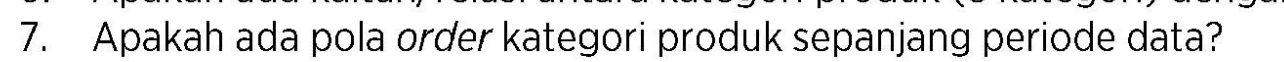

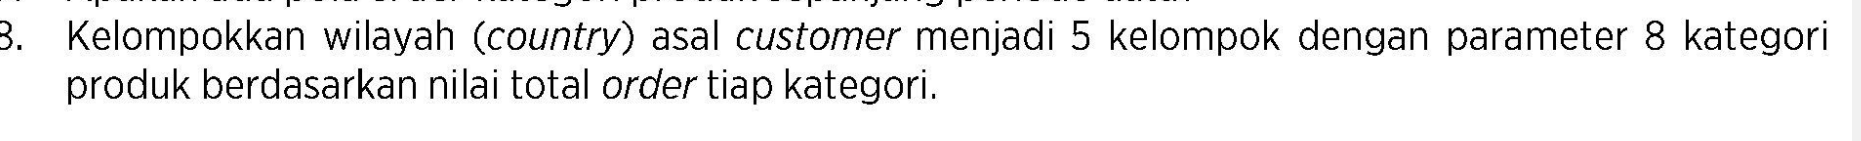

In [24]:
categories_products_order_details_order_customers.groupby(["Country"]).sum().sort_values("Nilai Penjualan",ascending=False)

,Category ID,Picture,ProductID,Units In Stock,Units On Order,Reorder Level,Discontinued,Order ID,Order Date Day,Order Date Month,Order Date Year,Unit Price_y,Quantity,Discount,Nilai Penjualan,Country Ordinal,Category Ordinal
Country,,,,,,,,,,,,,,,,,
USA,1470,0.0,14144,13860,2710,4050,39,3764864,5600,2339,702326,10462.91,9330,2094.0,245584.6105,6688.0,1118.0
Germany,1342,0.0,13409,13357,2810,3900,26,3487000,5232,2143,654398,8544.84,9213,2070.0,230284.6335,2624.0,1014.0
Austria,498,0.0,4832,4482,1620,1490,20,1332339,1954,680,249408,3469.95,5167,860.0,128003.8385,125.0,373.0
Brazil,821,0.0,8053,8608,1230,2365,19,2162294,3342,1149,405033,5324.64,4247,1350.0,106925.7765,609.0,618.0
France,788,0.0,7429,7851,1190,2230,16,1935829,2907,1075,363124,4805.81,3224,1005.0,80837.9125,1274.0,606.0
UK,567,0.0,5467,4849,1360,1790,12,1439114,2049,733,269363,3116.87,2742,310.0,58971.3100,2430.0,432.0
Venezuela,508,0.0,4813,4767,1120,1570,9,1260576,1941,639,235447,2434.91,2936,790.0,56810.6290,2360.0,390.0
Sweden,400,0.0,4150,4449,610,1145,8,1034937,1206,526,193545,2486.49,2235,685.0,54495.1400,1552.0,303.0
Canada,291,0.0,2975,2934,510,895,8,797169,992,418,149640,1907.50,1984,480.0,50196.2900,300.0,216.0


In [25]:
from sklearn.cluster import KMeans

# Normalisasi data dengan StandardScaler
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

normalized_df = pd.DataFrame(scaler.fit_transform(categories_products_order_details_order_customers[['Nilai Penjualan']]))

# Melakukan k-means clustering dengan jumlah klaster = 5
kmeans = KMeans(n_clusters=5, random_state=0).fit(normalized_df)

# Menambahkan kolom klaster pada DataFrame
categories_products_order_details_order_customers['Cluster'] = kmeans.fit_predict(normalized_df)
categories_products_order_details_order_customers.groupby(["Cluster","Country"]).sum()

Category ID  Picture  ProductID  Units In Stock  \
Cluster Country                                                        
0       Argentina            131      0.0       1340            1446   
        Austria              273      0.0       2515            2140   
        Belgium              149      0.0       1741            1444   
        Brazil               668      0.0       6486            7409   
        Canada               197      0.0       1957            2168   
...                          ...      ...        ...             ...   
4       Sweden                18      0.0        247             154   
        Switzerland            6      0.0         53               0   
        UK                    13      0.0        109              59   
        USA                   81      0.0        753             569   
        Venezuela             16      0.0        249             251   

                     Units On Order  Reorder Level  Discontinued  Order ID  \
Cluster Country                                                              
0       Argentina               300            400             2    356411   
        Austria                1180            885            10    733656   
        Belgium                 340            555             4    410154   
        Brazil                 1120           2035            14   1746104   
        Canada                  480            690             6    552540   
...                             ...            ...           ...       ...   
4       Sweden                   20             80             0     53222   
        Switzerland               0              0             1     11033   
        UK                        0              0             1     31712   
        USA                      10            130             6    200934   
        Venezuela                 0              0             0     42552   

                     Order Date Day  Order Date Month  Order Date Year  \
Cluster Country                                                          
0       Argentina               645               140            65857   
        Austria                1120               383           137668   
        Belgium                 571               158            75835   
        Brazil                 2638               957           327215   
        Canada                  663               267           103752   
...                             ...               ...              ...   
4       Sweden                   42                35             9976   
        Switzerland              17                 5             1996   
        UK                       38                18             5985   
        USA                     374               119            37905   
        Venezuela                46                24             7981   

                     Unit Price_y  Quantity  Discount  Nilai Penjualan  \
Cluster Country                                                          
0       Argentina          999.80       324       0.0        6904.1000   
        Austria           1128.68      2003     440.0       23302.2775   
        Belgium            668.08       739     150.0       11338.1550   
        Brazil            2826.21      2962    1130.0       41375.9825   
        Canada             915.70      1013     320.0       13890.2550   
...                           ...       ...       ...              ...   
4       Sweden             455.50       220      10.0       13172.2500   
        Switzerland         32.80        70      10.0        2066.4000   
        UK                 207.20       151      10.0        7993.7000   
        USA               1530.90      1181      95.0       53902.2750   
        Venezuela          188.80       195      10.0        8633.0000   

                     Country Ordinal  Category Ordinal  
Cluster Country                                         
0       Argentina            